In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from networkx.algorithms import bipartite
from numpy import linalg as LA
from numpy.linalg import matrix_rank
import numpy as np
import json
import itertools

In [3]:
def divisor_graph(fact_type):
    divisors = generate_tuples(fact_type)
    g=nx.empty_graph(divisors)
    for i in divisors:
        for j in divisors:
            if comparison(i, j) or comparison(j,i):
                g.add_edge(i,j)
    return g 

def comparison(tuple_1, tuple_2):
    if len(tuple_1) != len(tuple_2) or (tuple_1 == tuple_2):
        return False 
    for i in range(len(tuple_1)):
        if tuple_1[i] > tuple_2[i]:
            return False 
    return True 
    
    
def generate_tuples(a):
    # Create a list of ranges for each element in the tuple
    ranges = [range(ai + 1) for ai in a]
    
    # Use itertools.product to generate the Cartesian product of these ranges
    result = list(itertools.product(*ranges))
    
    return result
def edge_count(g):
    d = {}
    for item in g.degree:
        d[item[1]] = d.get(item[1], 0) + 1
    return d


# Test the code for various factorization types

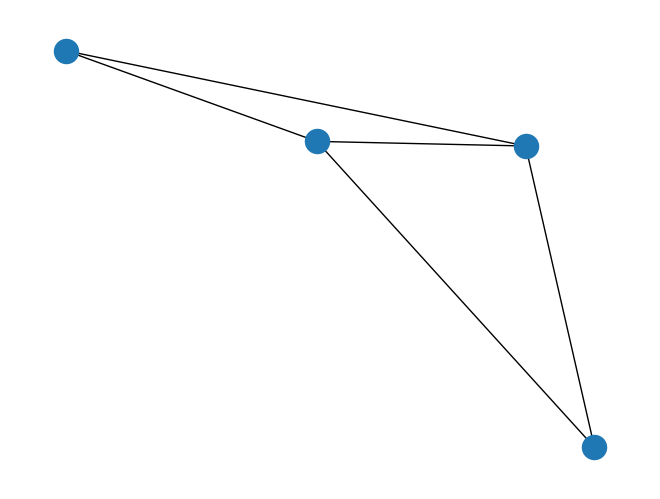

In [4]:
g = divisor_graph((1,1))
nx.draw(g)

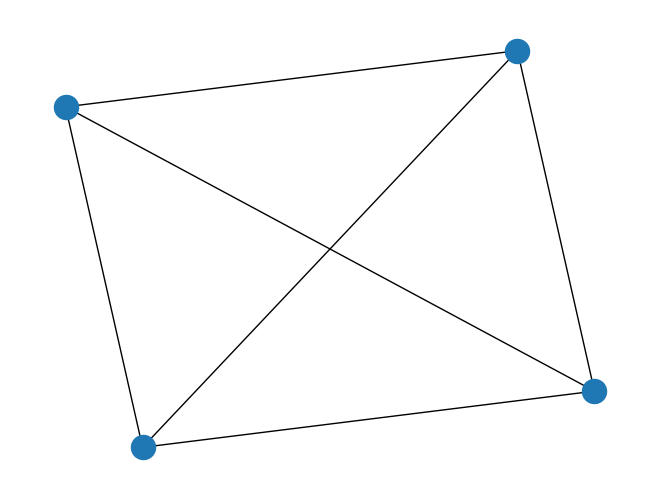

In [4]:
g = divisor_graph((3,))
nx.draw(g)

# Count the number of edges

In [37]:
d = {}
tuple_list = [(1,)*n for n in range(1, 6)]
for a in tuple_list:
    for e in range(1, 5):
        new_a= tuple([e*item for item in a]) 
        g = divisor_graph(new_a)
        if new_a not in d:
        #min_degree = sorted(g.degree(), key=lambda x: x[1])
            d[new_a] = edge_count(g)

In [36]:
d

{(1,): {1: 2},
 (2,): {2: 3},
 (1, 1): {3: 2, 2: 2},
 (2, 2): {8: 2, 6: 5, 4: 2},
 (1, 1, 1): {7: 2, 4: 6},
 (2, 2, 2): {26: 2, 18: 6, 10: 12, 14: 7}}

In [38]:
with open('degree_frequency_equal.txt', 'w') as f:
    for key, value in d.items():
         f.write(f'{key}: {value}\n')

In [6]:
fact_type = (1,1)
g = divisor_graph(fact_type)
adj_matrix = nx.adjacency_matrix(g)
matrix_size = adj_matrix.shape[0]
matrix = np.identity(matrix_size) + adj_matrix.todense()
print([fact_type, matrix_size-matrix_rank(matrix) ])

[(1, 1), 1]


# Eigenvalue -1

In [5]:
fact_type = (1,1)
d ={}
for i in range(2,10):
    g = divisor_graph(fact_type)
    adj_matrix = nx.adjacency_matrix(g)
    matrix_size = adj_matrix.shape[0]
    matrix = np.identity(matrix_size) + adj_matrix.todense()
    cal_rank = matrix_size-matrix_rank(matrix)
    d[len(fact_type)] = cal_rank
    fact_type = fact_type +(1,)
print(d)
print(d.values())
    

{2: 1, 3: 3, 4: 4, 5: 10, 6: 15, 7: 35, 8: 56, 9: 126}
dict_values([1, 3, 4, 10, 15, 35, 56, 126])


In [6]:
for i in range(10,12):
    g = divisor_graph(fact_type)
    adj_matrix = nx.adjacency_matrix(g)
    matrix_size = adj_matrix.shape[0]
    matrix = np.identity(matrix_size) + adj_matrix.todense()
    cal_rank = matrix_size-matrix_rank(matrix)
    d[len(fact_type)] = cal_rank
    fact_type = fact_type +(1,)
d

{2: 1, 3: 3, 4: 4, 5: 10, 6: 15, 7: 35, 8: 56, 9: 126, 10: 212, 11: 462}

In [7]:
for i in range(12,14):
    g = divisor_graph(fact_type)
    adj_matrix = nx.adjacency_matrix(g)
    matrix_size = adj_matrix.shape[0]
    matrix = np.identity(matrix_size) + adj_matrix.todense()
    cal_rank = matrix_size-matrix_rank(matrix)
    d[len(fact_type)] = cal_rank
    fact_type = fact_type +(1,)
d

{2: 1,
 3: 3,
 4: 4,
 5: 10,
 6: 15,
 7: 35,
 8: 56,
 9: 126,
 10: 212,
 11: 462,
 12: 814,
 13: 1716}

In [10]:
d

{2: 1,
 3: 3,
 4: 4,
 5: 10,
 6: 15,
 7: 35,
 8: 56,
 9: 126,
 10: 212,
 11: 462,
 12: 814,
 13: 1716}

In [13]:
with open('negative_one_eig.txt', 'w') as f:
    for key, value in d.items():
         f.write(f'{key}: {value}\n')

# Eigenvalue 0

In [8]:
fact_type = (1,1)
d ={}
for i in range(2,14):
    g = divisor_graph(fact_type)
    adj_matrix = nx.adjacency_matrix(g)
    matrix_size = adj_matrix.shape[0]
    matrix = 0*np.identity(matrix_size) + adj_matrix.todense()
    cal_rank = matrix_size-matrix_rank(matrix)
    d[len(fact_type)] = cal_rank
    fact_type = fact_type +(1,)
d

{2: 1,
 3: 0,
 4: 2,
 5: 0,
 6: 5,
 7: 0,
 8: 14,
 9: 0,
 10: 42,
 11: 0,
 12: 132,
 13: 0}

# Eigenvalue -2

In [15]:
fact_type = (1,)
d ={}
for i in range(2,15):
    g = divisor_graph(fact_type)
    adj_matrix = nx.adjacency_matrix(g)
    matrix_size = adj_matrix.shape[0]
    matrix = 2*np.identity(matrix_size) + adj_matrix.todense()
    cal_rank = matrix_size-matrix_rank(matrix)
    d[len(fact_type)] = cal_rank
    fact_type = fact_type +(1,)
d

{1: 0,
 2: 0,
 3: 2,
 4: 0,
 5: 10,
 6: 0,
 7: 42,
 8: 0,
 9: 170,
 10: 0,
 11: 682,
 12: 0,
 13: 2730}

In [16]:
[item for item in d.values() if item>0]

[2, 10, 42, 170, 682, 2730]

# Eigenvalue 1

In [14]:
fact_type = (1,1)
d ={}
for i in range(1,14):
    g = divisor_graph(fact_type)
    adj_matrix = nx.adjacency_matrix(g)
    matrix_size = adj_matrix.shape[0]
    matrix = (-1)*np.identity(matrix_size) + adj_matrix.todense()
    cal_rank = matrix_size-matrix_rank(matrix)
    d[len(fact_type)] = cal_rank
    fact_type = fact_type +(1,)
d

{2: 0,
 3: 2,
 4: 0,
 5: 5,
 6: 0,
 7: 14,
 8: 0,
 9: 42,
 10: 0,
 11: 132,
 12: 0,
 13: 429,
 14: 0}